In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 20})

# Problem#3: Newman 5.23: Image processing and the STM

$\textbf{Part a}$\
$\textbf{Reading the data and storing in an array}$

In [3]:
file=open('altitude.txt',"r")
data=file.read().splitlines()   
print(np.shape(data))
type(data)

(512,)


list

Note: Data that I got was in the form of a list of 512 string elements

In [4]:
print('Length of first element is',len(data[0].split()))

Length of first element is 1024


And each element has 1024 string elemnts

In [5]:
data_list=[]

###----------------------------###
## Here I used an empty list name data_list to convert each elements of data file into a float
###----------------------------###


for i in range(len(data)):
    r=data[i].split()
    for m in range(len(r)):
        s=r[m]
        t=float(s)
        data_list.append(t)
print('Data type of data_list ;',type(data_list))


array_data=np.array(data_list)    ### Simply converted the list of float elements into an array

print('Data type of array_data ;',type(array_data))

Image=np.reshape(array_data,(512,1024)) ### Changed the shape of array into the given pixel dimensions

print('shape of array_grid ;',np.shape(Image))    ## So, Image is my final data stored in array##     
  

 

Data type of data_list ; <class 'list'>
Data type of array_data ; <class 'numpy.ndarray'>
shape of array_grid ; (512, 1024)


Problem asked to write a program that reads this file and store data in an array. There is one other simplest way of generating numpy data from text file that I learned in one of my previous coursework of Statistical data analysis. In the cell below I used that function to plot the figure 2:

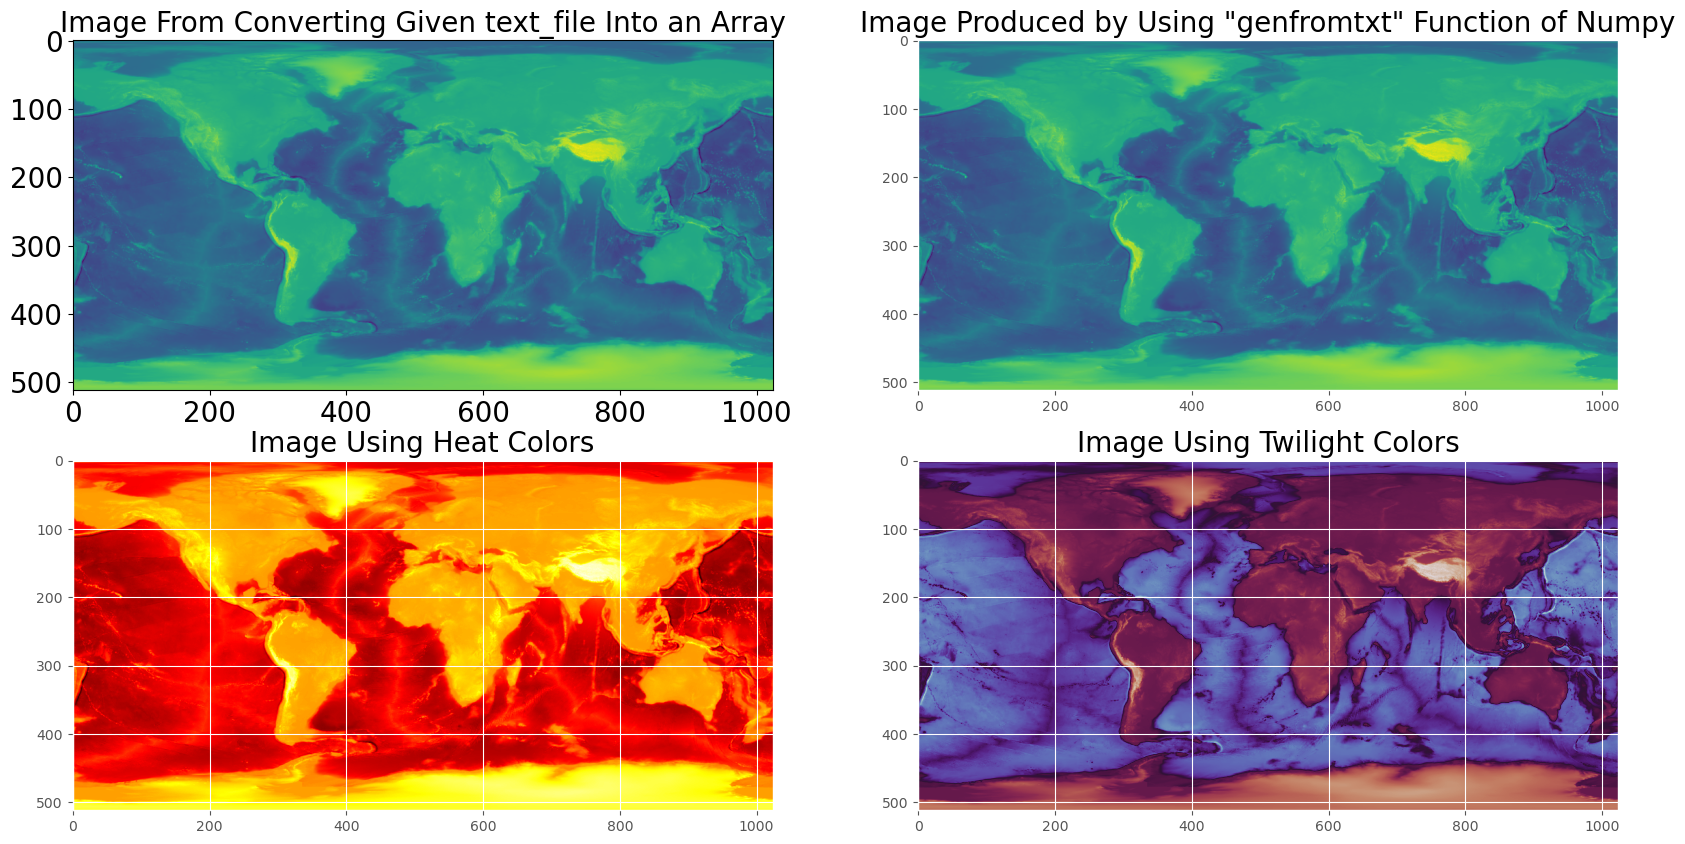

In [6]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.style.use('ggplot')
plt.imshow(Image)
plt.grid(False)
plt.title('Image From Converting Given text_file Into an Array',fontsize=20)

plt.subplot(2,2,2)
DATA=np.genfromtxt('altitude.txt')   ##genfromtxt converts text file into a numpy array
plt.imshow(DATA)
plt.grid(False)
plt.title('Image Produced by Using "genfromtxt" Function of Numpy',fontsize=20)

plt.subplot(2,2,3)
plt.style.use('ggplot')
plt.imshow(Image,'hot')
plt.title('Image Using Heat Colors',fontsize=20)

plt.subplot(2,2,4)
plt.style.use('ggplot')
plt.imshow(Image,'twilight')
plt.title('Image Using Twilight Colors',fontsize=20)
plt.show()

# Now, defining and computing partial derivates $\partial{w}/\partial{x}$, and $\partial{w}/\partial{y}$ of the given data(Image)

In [7]:
def delw_dely(data,dimension,h):
    partial_y=np.zeros_like(data)
    partial_y[0,:]=(data[1,:]-data[0,:])/h
    for i in range(1,dimension):
        partial_y[i,:]=(data[i,:]-data[i-1,:])/h
    partial_y[dimension-1,:]=(data[dimension-1,:]-data[dimension-2,:])/h
    return partial_y
        
def delw_delx(data,dimension,h):
    partial_x=np.zeros_like(data)
    partial_x[:,0]=(data[:,1]-data[:,0])/h
    width=len(data[0,:])   ### because in x-direction, array has 1024 columns which I took as width of Image
    for i in range(1,width):
        partial_x[:,i]=(data[:,i]-data[:,i-1])/h
    partial_x[:,width-1]=(data[:,width-1]-data[:,width-2])/h
    return partial_x

In [8]:
partial_w_x=delw_delx(Image,512,30000)
partial_w_y=delw_dely(Image,512,30000)
print('shape of del_w/x=',np.shape(partial_w_x))
print('shape of del_w/y=',np.shape(partial_w_y))


shape of del_w/x= (512, 1024)
shape of del_w/y= (512, 1024)


$\textbf{Part b}$\
$\textbf{Defining and then calculating the intensity for each grid using}$\
\
$$I = \frac{cos\phi(\partial{w}/\partial{x})+sin\phi(\partial{w}/\partial{y})}{\sqrt{(\partial{w}/\partial{x})^2+(\partial{w}/\partial{y})^2+1}}$$

In [9]:
def Intensity(phi,partial_x,partial_y):
    return (np.cos(phi)*partial_x+np.sin(phi)*partial_y)/(np.sqrt(partial_x**2+partial_y**2+1))

In [10]:
I=Intensity(np.pi/4,partial_w_x,partial_w_y)
np.shape(I)

(512, 1024)

In [11]:
plt.rcParams.update({'font.size': 20})

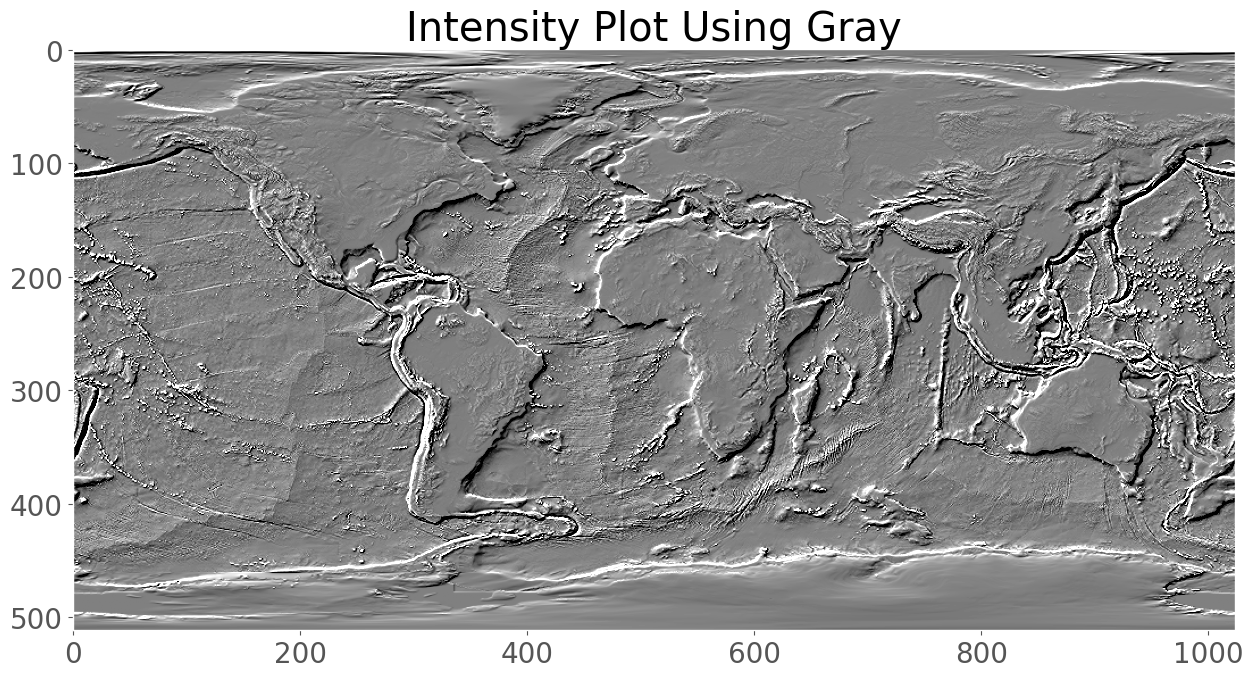

In [12]:
fig = plt.figure(figsize=(15,12))
plt.imshow(I,'gray',vmin=-0.02,vmax=0.02)
plt.title('Intensity Plot Using Gray')
plt.grid(False)
plt.show()

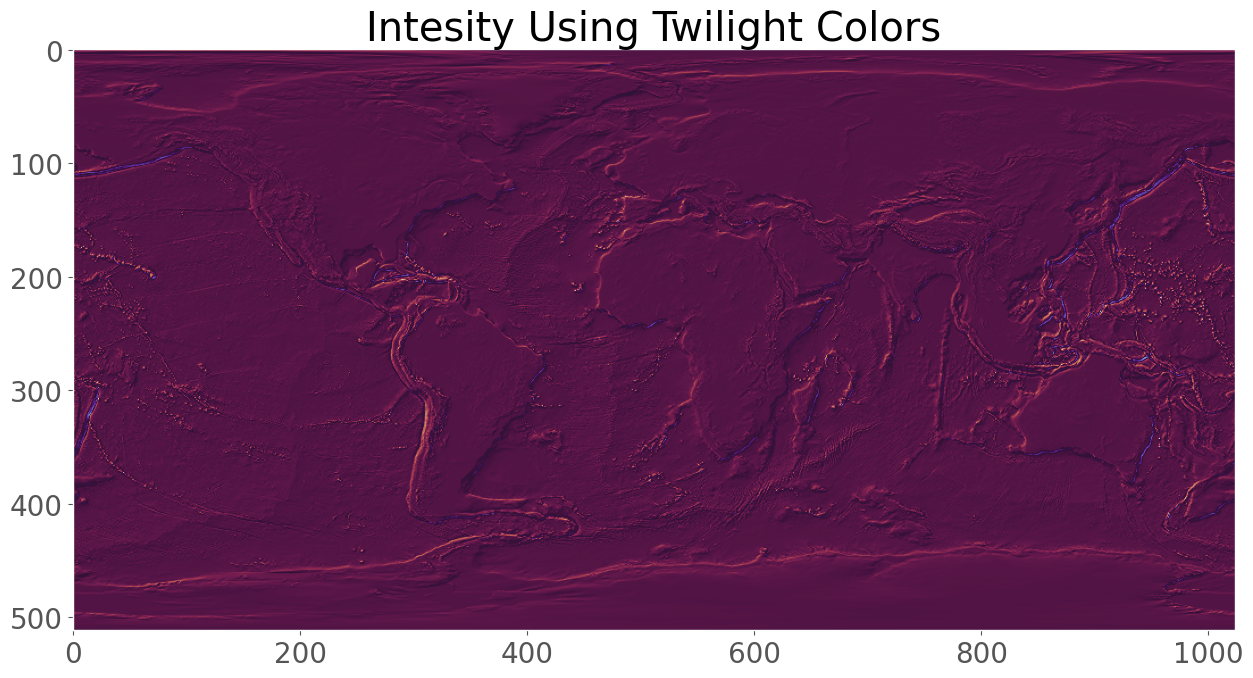

In [13]:
fig = plt.figure(figsize=(15,12))
plt.imshow(I,'twilight')
plt.title('Intesity Using Twilight Colors')  ##This is my favorite color in Imshow
plt.grid(False)
plt.show()

$\textbf{Part c}$\
$\textbf{A scanning tunneling microscope (STM)}$

In [14]:
STM_DATA=np.genfromtxt('stm.txt')

In [15]:
file_STM=open('stm.txt',"r")
data_STM=file_STM.read().splitlines() 
print('Shape od data is',np.shape(data_STM))
print('Length of first element is',len(data_STM[0].split()))

Shape od data is (663,)
Length of first element is 676


In [16]:
data_list_STM=[]
for i in range(len(data_STM)):
    r=data_STM[i].split()
    for m in range(len(r)):
        s=r[m]
        t=float(s)
        data_list_STM.append(t)
array_data_STM=np.array(data_list_STM)    ### Simply converted the list of float elements into an array

STM=np.reshape(array_data_STM,(663,676))

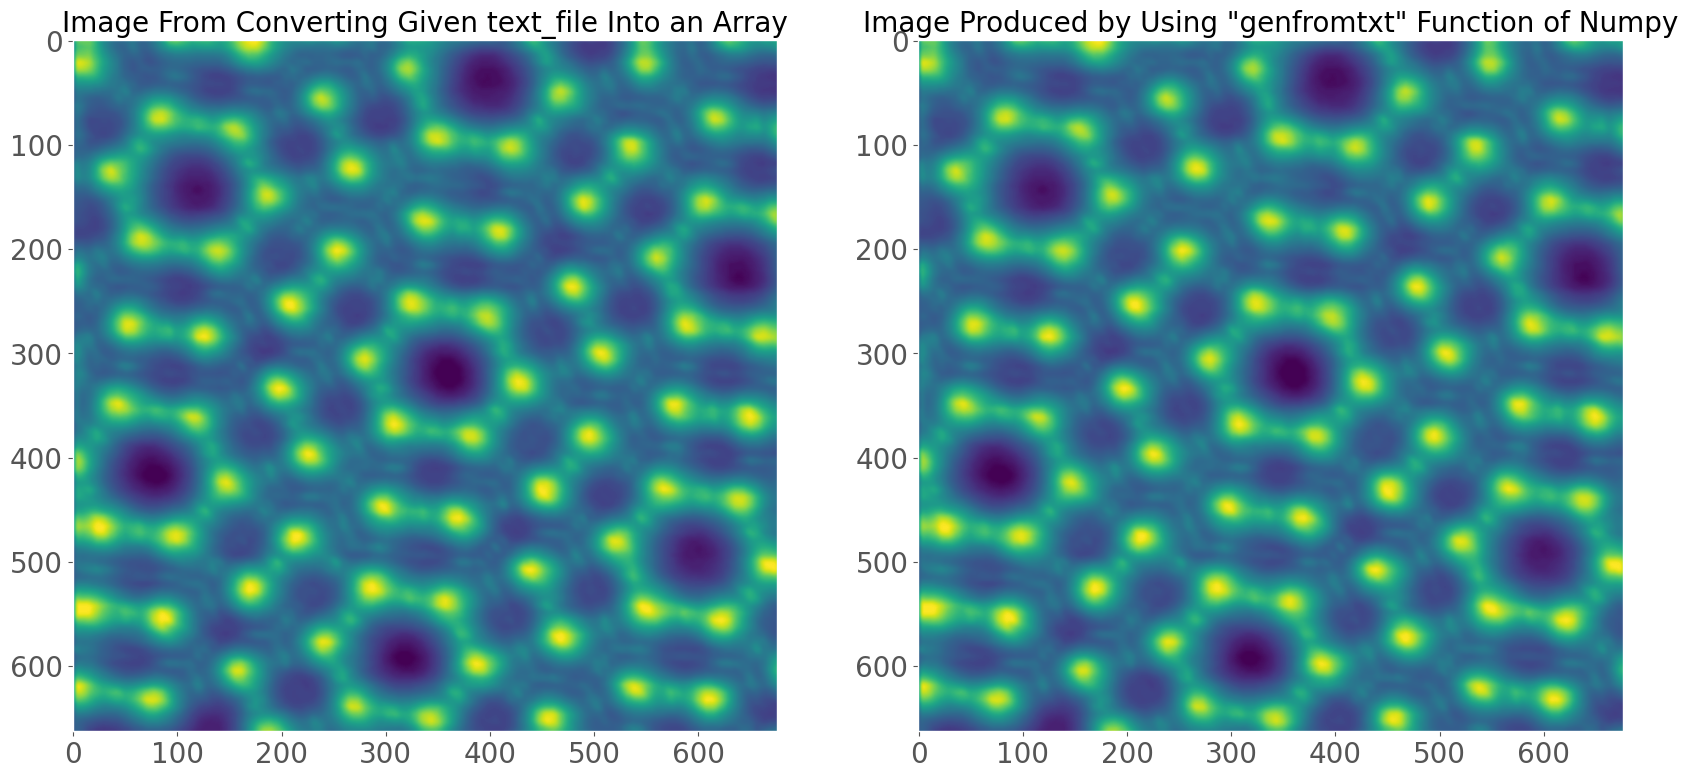

In [17]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(STM)
plt.grid(False)
plt.title('Image From Converting Given text_file Into an Array',fontsize=20)

plt.subplot(1,2,2)
plt.imshow(STM_DATA)
plt.grid(False)
plt.title('Image Produced by Using "genfromtxt" Function of Numpy',fontsize=20)
plt.show()

# Now, computing partial derivates $\partial{w}/\partial{x}$, $\partial{w}/\partial{y}$, and Intensity of the given data(STM)

In [18]:
d_w_x_STM=delw_delx(STM,663,2.5)
d_w_y_STM=delw_dely(STM,663,2.5)
I_STM=Intensity(np.pi/2,d_w_x_STM,d_w_y_STM)       #### Angle phi is taken 90˚ here
print('shape of del_w/x=',np.shape(d_w_x_STM))
print('shape of del_w/y=',np.shape(d_w_y_STM))
print('shape of I_STM=',np.shape(I_STM))


shape of del_w/x= (663, 676)
shape of del_w/y= (663, 676)
shape of I_STM= (663, 676)


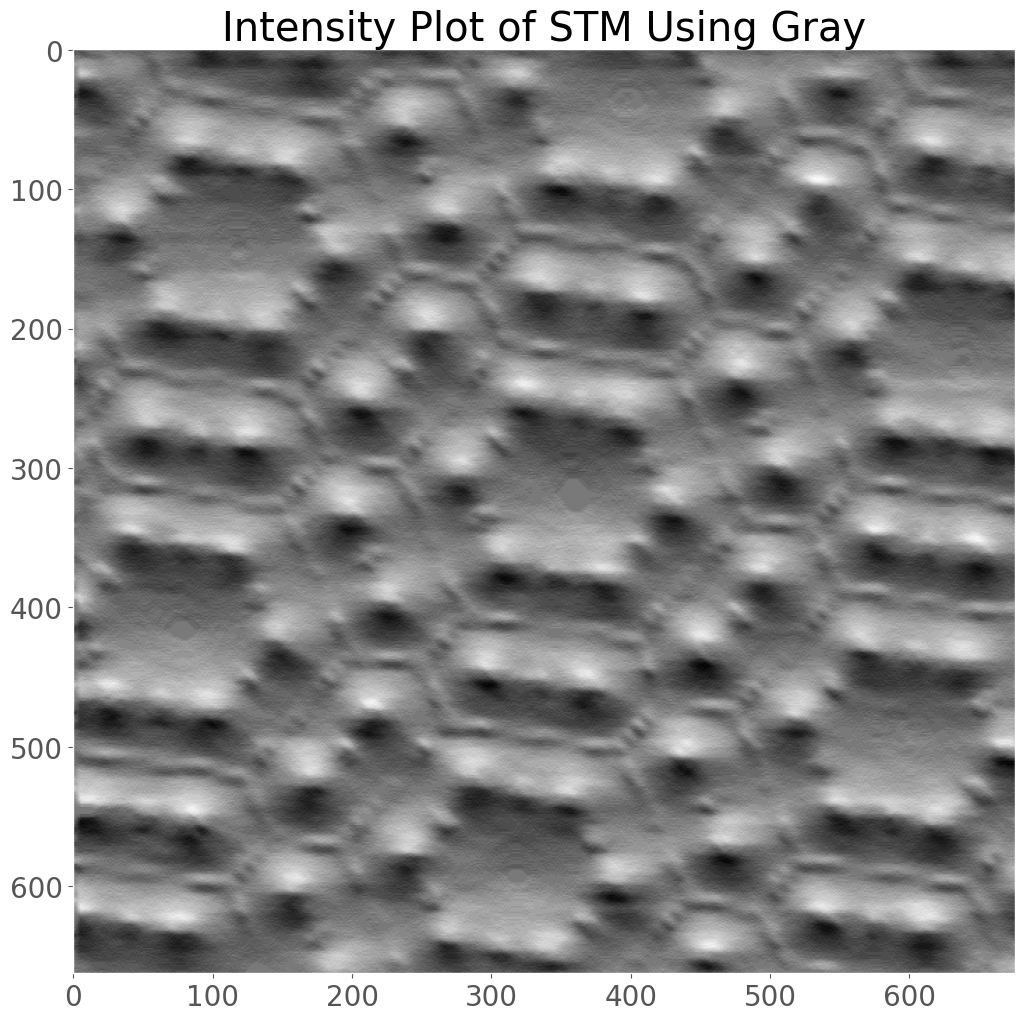

In [19]:
fig = plt.figure(figsize=(15,12))
plt.imshow(I_STM,'gray')
plt.title('Intensity Plot of STM Using Gray')
plt.grid(False)
plt.show()

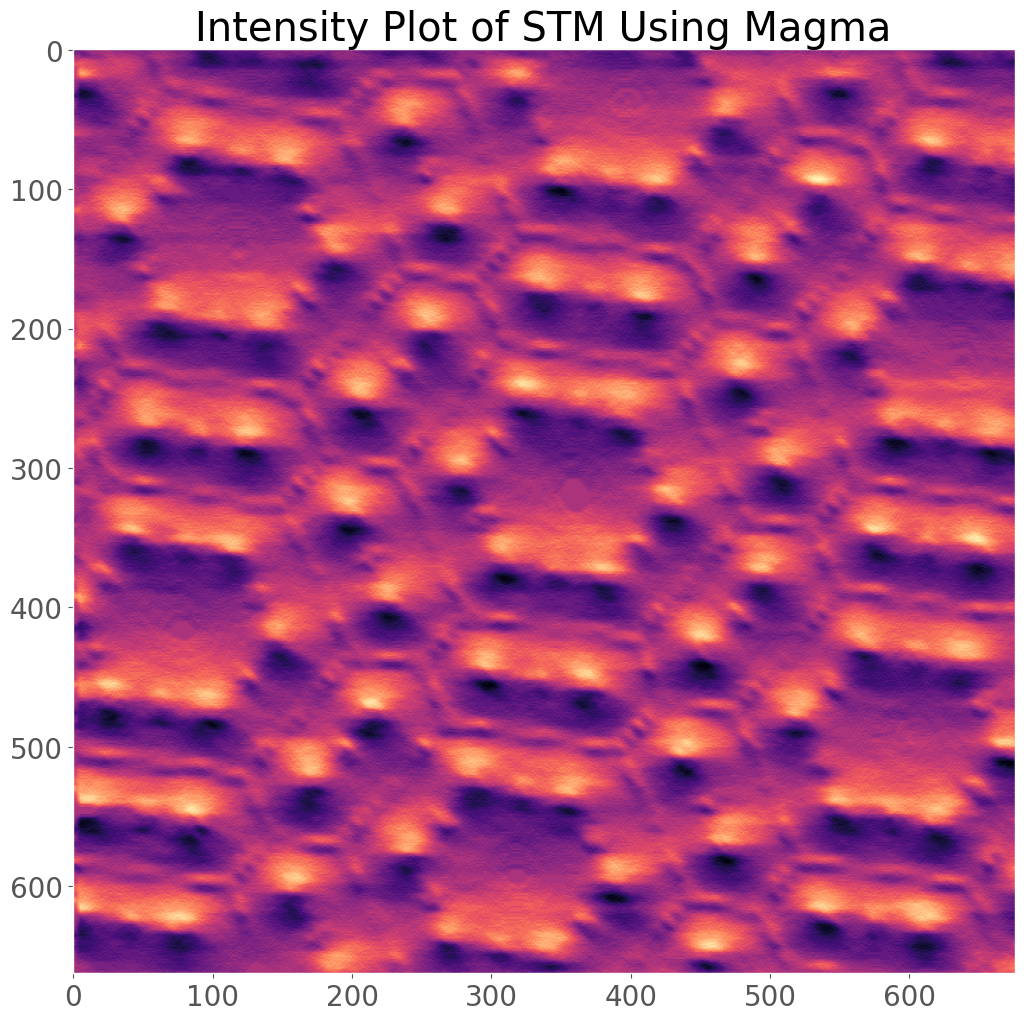

In [20]:
fig = plt.figure(figsize=(15,12))
plt.imshow(I_STM,'magma')
plt.title('Intensity Plot of STM Using Magma')
plt.grid(False)
plt.show()

Now plotting Intensity by taking into consideration various angles $\phi$

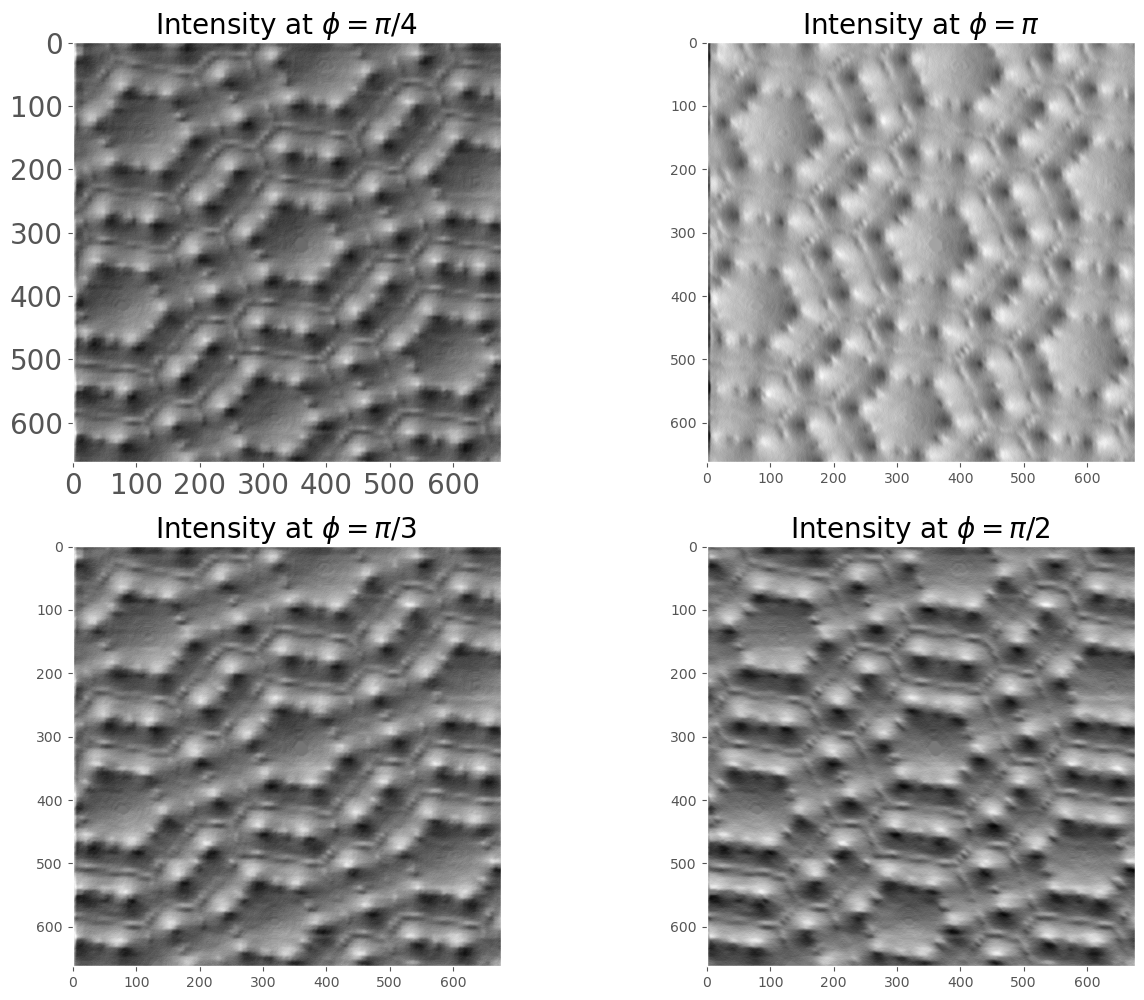

In [21]:

fig = plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.style.use('ggplot')
plt.imshow(Intensity(np.pi/4,d_w_x_STM,d_w_y_STM),'gray')
plt.title('Intensity at $\phi=\pi/4$',fontsize=20)
plt.grid(False)

plt.subplot(2,2,2)
plt.style.use('ggplot')
plt.imshow(Intensity(np.pi,d_w_x_STM,d_w_y_STM),'gray')
plt.title('Intensity at $\phi=\pi$',fontsize=20)
plt.grid(False)

plt.subplot(2,2,3)
plt.style.use('ggplot')
plt.imshow(Intensity(np.pi/3,d_w_x_STM,d_w_y_STM),'gray')
plt.title('Intensity at $\phi=\pi/3$',fontsize=20)
plt.grid(False)

plt.subplot(2,2,4)
plt.style.use('ggplot')
plt.imshow(Intensity(np.pi/2,d_w_x_STM,d_w_y_STM),'gray')
plt.title('Intensity at $\phi=\pi/2$',fontsize=20)
plt.grid(False)
plt.show()